In [93]:
# Import Libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [94]:
# Load the data/csv file
file_path = Path("C:\\Users\\Samanthi Nisanka\\OneDrive\\Desktop\\bootcamp\\Module20\\Starter_Code\\myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [95]:
# check null values
null = df.isnull().sum()
null

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [96]:
#check duplicate rows
duplicate = df.duplicated().sum()
duplicate

0

In [97]:
# drop column 'MYOPIC'
target = df['MYOPIC']
features = df.drop('MYOPIC', axis=1)
features

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [98]:
features.shape


(618, 14)

In [99]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

## Apply Dimensionality Reduction


In [100]:
# Applying Principal component analysis (PCA)to reduce dimentions
# Initialize PCA model

pca = PCA(n_components=0.9)

# Get two principal components

myopia_pca = pca.fit_transform(scaled_data)

In [101]:
#Transform PCA data to a DataFrame
df1_myopia_pca = pd.DataFrame(data=myopia_pca)
df1_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [102]:
# Explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [103]:
df1_myopia_pca.shape

(618, 10)

###### Principal component analysis has reduced the features in the data frame "features" from (618,14) to (618,10)

# TSNE

In [105]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df1_myopia_pca)

C:\Users\Samanthi Nisanka\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Samanthi Nisanka\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.014s...
[t-SNE] Computed neighbors for 618 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.301571
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.593140
[t-SNE] KL divergence after 1000 iterations: 1.153272


In [106]:
z

array([[-15.015519 ,  -6.7680836],
       [-20.579807 ,   5.348768 ],
       [ 17.427956 ,   4.5659657],
       ...,
       [-19.101198 ,   7.4690943],
       [ 16.756004 ,  17.033443 ],
       [-18.732677 ,  -0.9602263]], dtype=float32)

<AxesSubplot:xlabel='comp-1', ylabel='comp-2'>

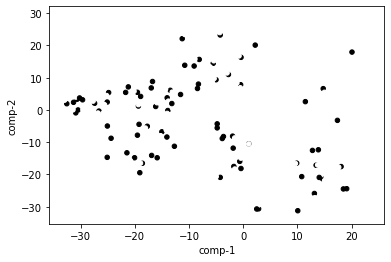

In [137]:
#import seaborn as sns
df1 = pd.DataFrame()
y = labels
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]
labels = df["MYOPIC"]

#sns.scatterplot(x="comp-1", y="comp-2", hue="MYOPIC",
                #palette=sns.color_palette("hls", 3),
                #data=df1).set(title="Myopia Dataset T-SNE projection")
df1.plot(x="comp-1",y="comp-2",c=labels,kind="scatter")

In [116]:
import warnings
warnings.filterwarnings("ignore")

# Part 3: Cluster Analysis with K-means

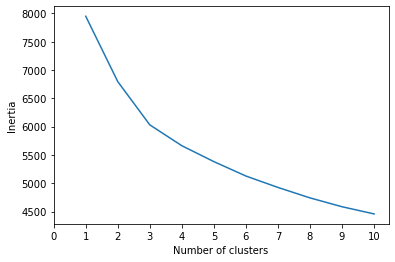

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825


In [119]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df1_myopia_pca)
    u = km.inertia_
    inertia.append(u)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

# Using Inertia Value to find Optimal Hyperparameters

In [123]:
# Using Inertia Value for Finding Optimal Hyperparameters

init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=3, random_state=42, init=init)
    kmeans_model.fit(features)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

,Inertia Value
k-means++,93108.597058
random,93108.597058


# Comparing Predictions to original labels

In [124]:
predictions = kmeans_model.predict(features)
predictions

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2,

In [125]:
df["Class"] = predictions
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,Class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,2
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,2
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0,2
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0,2
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0,1


# Age of children in the dataset

In [126]:
df["AGE"].unique()

array([6, 5, 7, 8, 9], dtype=int64)

# Hierarchial_Clustering Confirming the distinguishability of the dataset

In [128]:
normalized = normalize(features)

In [129]:
mergings = linkage(normalized, method="ward")

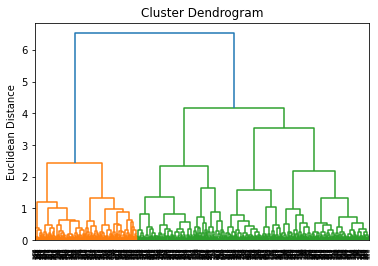

In [131]:
plt.figure()
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.ylabel('Euclidean Distance')
plt.title('Cluster Dendrogram')
plt.show()

By reduceing dimension for visualization using PCA and t-SNE,no specific pattern or clusters within the dataset was obtained. Hierarchial clustering with further refinement of hyperparameters could potentially yield a better performing predictive model.